In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
network = pd.read_csv('Network_data.csv')

#### Understanding the data

In [3]:
network.head()

,Timestamp,Signal Strength (dBm),SNR,Call Duration (s),Environment,Attenuation,Distance to Tower (km),Tower ID,User ID,Call Type,Incoming/Outgoing
0,2022-01-03 17:46:13,-84.119763,25.940082,1713.800550,urban,14.690438,2.243176,5,25,data,incoming
1,2022-01-04 17:29:31,-87.806131,15.937354,345.371848,home,6.213698,5.002566,3,22,voice,incoming
2,2022-01-05 17:14:01,-116.575176,14.709384,259.285043,open,4.494415,8.705974,2,5,voice,incoming
3,2022-01-06 16:02:29,-82.961183,21.727165,357.974004,home,7.619957,7.427025,5,33,data,outgoing
4,2022-01-07 22:19:17,-85.012574,26.058158,398.006716,urban,10.655159,0.612071,5,8,voice,outgoing


In [4]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               463 non-null    object 
 1   Signal Strength (dBm)   463 non-null    float64
 2   SNR                     463 non-null    float64
 3   Call Duration (s)       463 non-null    float64
 4   Environment             463 non-null    object 
 5   Attenuation             463 non-null    float64
 6   Distance to Tower (km)  463 non-null    float64
 7   Tower ID                463 non-null    int64  
 8   User ID                 463 non-null    int64  
 9   Call Type               463 non-null    object 
 10  Incoming/Outgoing       463 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 39.9+ KB


In [5]:
network.shape

(463, 11)

In [6]:
network.columns

Index(['Timestamp', 'Signal Strength (dBm)', 'SNR', 'Call Duration (s)',
       'Environment', 'Attenuation', 'Distance to Tower (km)', 'Tower ID',
       'User ID', 'Call Type', 'Incoming/Outgoing'],
      dtype='object')

In [7]:
network.describe()

,Signal Strength (dBm),SNR,Call Duration (s),Attenuation,Distance to Tower (km),Tower ID,User ID
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,-84.957137,19.834262,895.324971,5.459605,5.064669,5.531317,52.198704
std,14.349536,5.579039,529.838188,3.502259,2.956370,2.837327,27.969438
min,-118.681318,10.271411,11.520904,0.042255,0.026375,1.000000,1.000000
25%,-95.936519,14.857527,418.499303,2.815069,2.509455,3.000000,29.000000
50%,-84.230276,19.584328,910.509884,4.758147,5.183831,6.000000,54.000000
75%,-74.430044,24.648712,1362.754612,7.573055,7.708894,8.000000,75.500000
max,-50.122222,29.963213,1795.175137,14.939793,9.981806,10.000000,100.000000


### Missing values

In [8]:
network.isnull().sum()

Timestamp                 0
Signal Strength (dBm)     0
SNR                       0
Call Duration (s)         0
Environment               0
Attenuation               0
Distance to Tower (km)    0
Tower ID                  0
User ID                   0
Call Type                 0
Incoming/Outgoing         0
dtype: int64

### Outliers 

In [9]:
numerical_col = ['Signal Strength (dBm)', 'SNR', 'Call Duration (s)', 'Attenuation', 'Distance to Tower (km)']

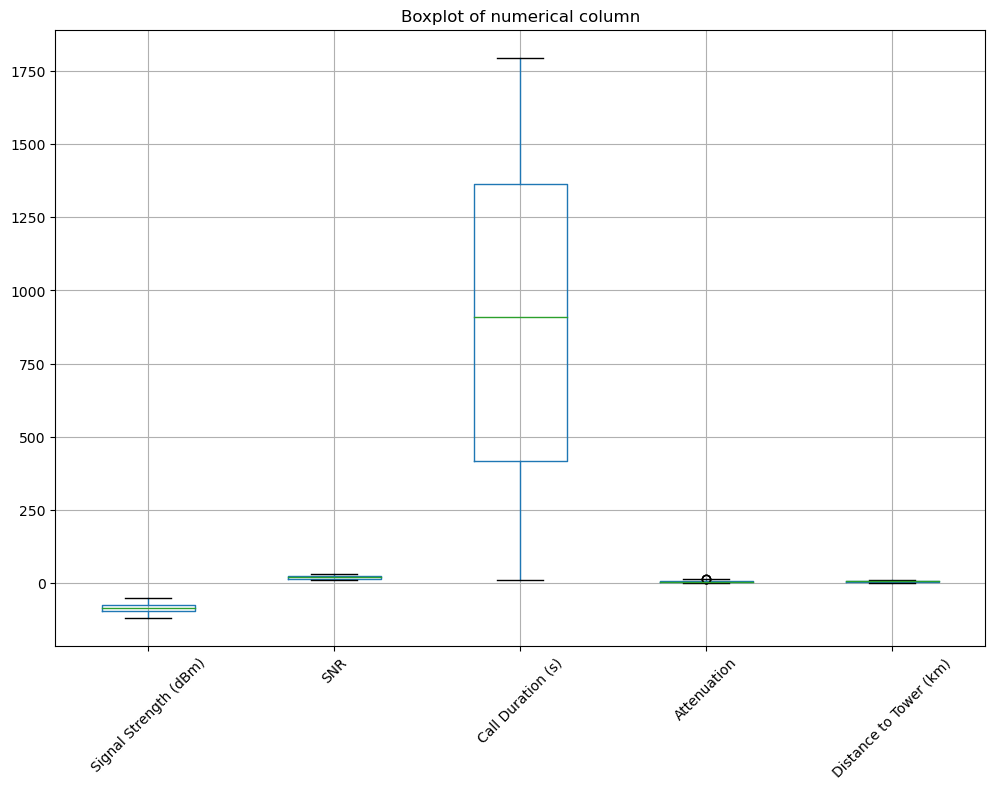

In [10]:
plt.figure(figsize=(12,8))
network[numerical_col].boxplot()
plt.title('Boxplot of numerical column')
plt.xticks(rotation = 45)
plt.show()

I guess there are no no outliers in the data, as there are no data point outside the boxplot

#### Checking for linear relationships

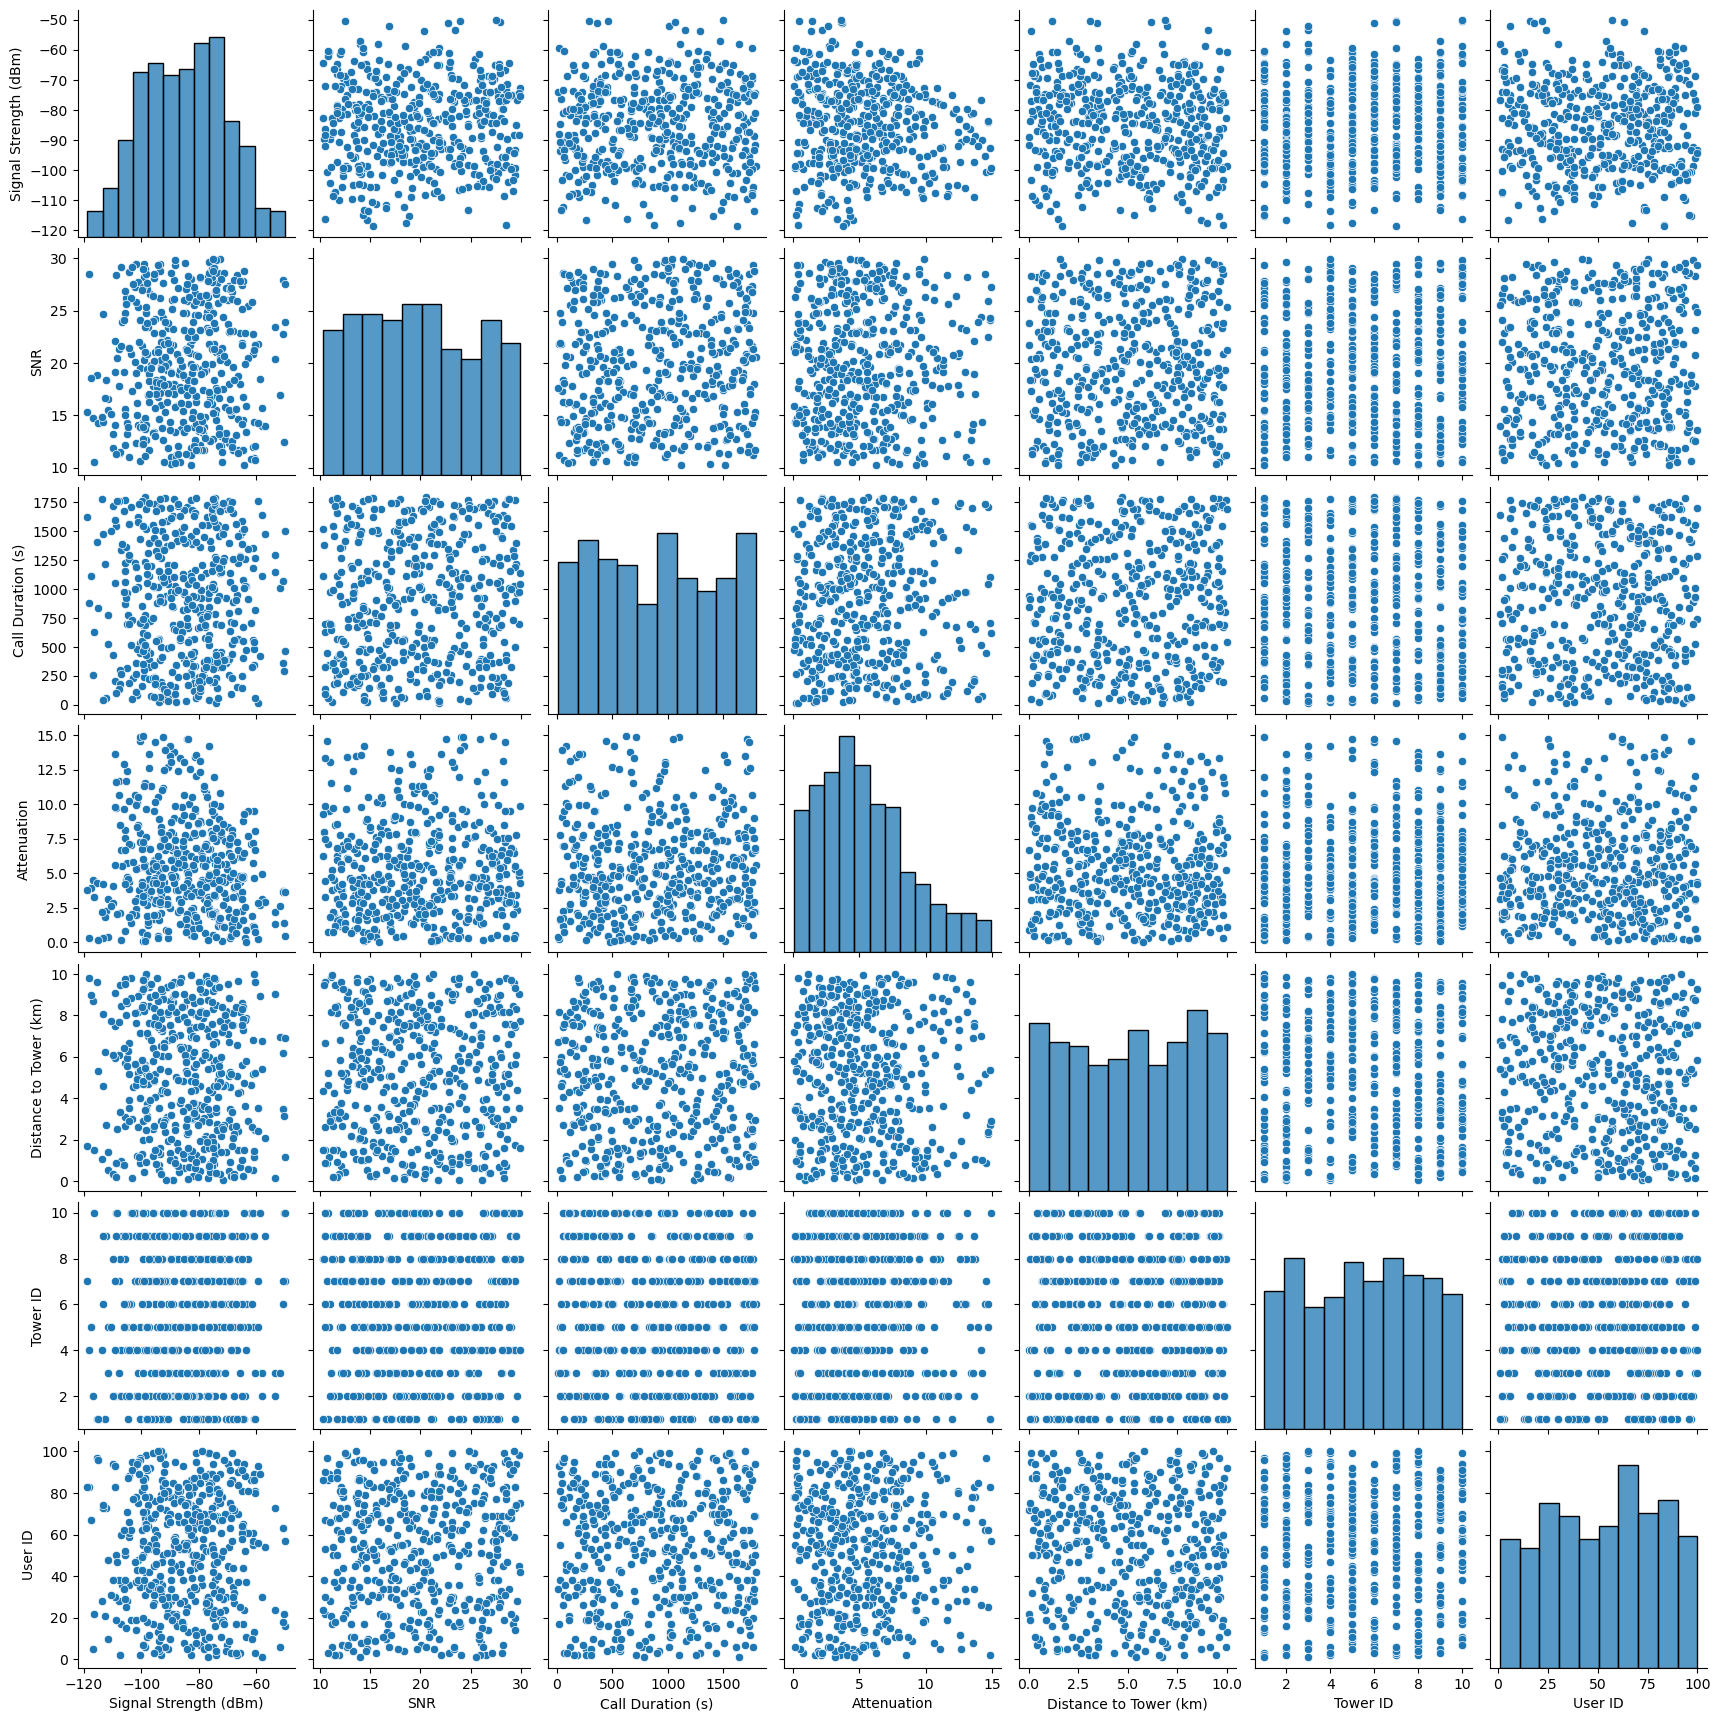

In [11]:
sns.pairplot(data = network)

#### Converting categorical variables to numerical

##### One - hot encoding

In [12]:
# Using pd.get_dummies to encode categorical columns
encoded = pd.get_dummies(network[['Environment', 'Call Type', 'Incoming/Outgoing']], drop_first=True,dtype=int)

# Dropping the original columns and concatenating the encoded ones
network = network.drop(columns=['Environment', 'Call Type', 'Incoming/Outgoing'])
network = pd.concat([network, encoded], axis=1)

# Displaying the first few rows to check if the encoding worked
print(network.head())


             Timestamp  Signal Strength (dBm)        SNR  Call Duration (s)  \
0  2022-01-03 17:46:13             -84.119763  25.940082        1713.800550   
1  2022-01-04 17:29:31             -87.806131  15.937354         345.371848   
2  2022-01-05 17:14:01            -116.575176  14.709384         259.285043   
3  2022-01-06 16:02:29             -82.961183  21.727165         357.974004   
4  2022-01-07 22:19:17             -85.012574  26.058158         398.006716   

   Attenuation  Distance to Tower (km)  Tower ID  User ID  Environment_open  \
0    14.690438                2.243176         5       25                 0   
1     6.213698                5.002566         3       22                 0   
2     4.494415                8.705974         2        5                 1   
3     7.619957                7.427025         5       33                 0   
4    10.655159                0.612071         5        8                 0   

   Environment_suburban  Environment_urban  Call T

#### Split the data into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = network.drop(columns = ['Signal Strength (dBm)','Timestamp','User ID'])
y = network['Signal Strength (dBm)']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(370, 10)
(93, 10)
(370,)
(93,)


### Linear regression

In [17]:
import statsmodels
import statsmodels.api as sm
import sklearn

#### Train the model

In [18]:
X_train_sm = sm.add_constant(X_train)

# fit the model
lr = sm.OLS(y_train,X_train_sm).fit()

In [19]:
lr.params

const                        -77.880960
SNR                            0.072234
Call Duration (s)              0.000444
Attenuation                    0.162883
Distance to Tower (km)        -0.246496
Tower ID                       0.049064
Environment_open              -3.714696
Environment_suburban          -6.422296
Environment_urban            -12.080410
Call Type_voice               -4.046573
Incoming/Outgoing_outgoing    -2.099248
dtype: float64

In [20]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Signal Strength (dBm)   R-squared:                       0.105
Model:                               OLS   Adj. R-squared:                  0.080
Method:                    Least Squares   F-statistic:                     4.227
Date:                   Mon, 30 Sep 2024   Prob (F-statistic):           1.44e-05
Time:                           21:10:42   Log-Likelihood:                -1485.0
No. Observations:                    370   AIC:                             2992.
Df Residuals:                        359   BIC:                             3035.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -77.8810      4.254    -18.309      0.000     -86.246     -69.516
SNR                            0.0722      0.130      0.557      0.578      -0.183       0.327
Call Duration (s)              0.0004      0.001      0.331      0.741      -0.002       0.003
Attenuation                    0.1629      0.319      0.511      0.609      -0.464       0.789
Distance to Tower (km)        -0.2465      0.241     -1.021      0.308      -0.721       0.228
Tower ID                       0.0491      0.250      0.196      0.845      -0.443       0.542
Environment_open              -3.7147      2.199     -1.689      0.092      -8.039       0.610
Environment_suburban          -6.4223      2.088     -3.076      0.002     -10.528      -2.316
Environment_urban            -12.0804      2.498     -4.837      0.000     -16.992      -7.168
Call Type_voice               -4.0466      1.436     -2.817      0.005      -6.871      -1.222
Incoming/Outgoing_outgoing    -2.0992      1.425     -1.474      0.141      -4.901       0.702
==============================================================================
Omnibus:                        6.654   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                4.412
Skew:                          -0.103   Prob(JB):                        0.110
Kurtosis:                       2.506   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Clearly from the R-value and the pairplot we can say that there is no linear relationships so using the Random forest model further

### Random forest regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

#### Building the model

In [22]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X,y)

RandomForestRegressor(random_state=42)

In [23]:
y_pred_rf = rf.predict(X)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y,y_pred_rf)

0.8459260111291911

### Feature Importance 

In [26]:
# For Random Forest
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
2,Attenuation,0.205754
1,Call Duration (s),0.180363
3,Distance to Tower (km),0.180166
0,SNR,0.179801
4,Tower ID,0.107148
7,Environment_urban,0.045152
5,Environment_open,0.032673
8,Call Type_voice,0.029669
9,Incoming/Outgoing_outgoing,0.021194
6,Environment_suburban,0.018080


Attenuation, Call Duration, Distance to Tower, and SNR are the key factors driving the network's performance or signal strength. These are the areas where improvements in infrastructure (like reducing attenuation or optimizing tower placement) can have the most significant impact.

Environment and Tower ID show moderate importance, indicating that geographical and structural factors do play a role in network performance, but they are secondary to the signal-related variables.

Call Type and Incoming/Outgoing status have the least influence on network performance, suggesting that once the core infrastructure and signal-related factors are addressed, these factors have a smaller role in further optimizations.

Reduce Attenuation: Focus on minimizing signal loss due to physical obstructions or distance by improving tower placement or enhancing transmission power.

Optimize Tower Locations: Since the distance to the tower and tower ID are important, expanding the network of towers or optimizing their distribution could improve performance.

Improve SNR: Work on improving signal quality by reducing interference, as a higher SNR results in better network performance.